<a href="https://colab.research.google.com/github/a-drew/banan.ai-mp1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Starter Imports

In [102]:
import os
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import *

2. Pre-Analysis

['business', 'entertainment', 'politics', 'sport', 'tech']
[510, 386, 417, 511, 401]


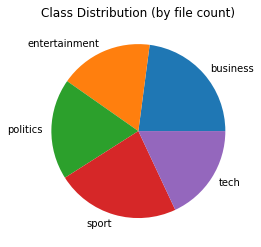

In [103]:
categories = sorted([file for file in os.listdir('data/BBC') if file != 'README.TXT'])
print(categories)
counts = [len([name for name in os.listdir('data/BBC/' + category)]) for category in categories]
print(counts)

plt.pie(counts, labels=categories)
plt.title('Class Distribution (by file count)')

plt.savefig('output/BBC-distribution.pdf')
plt.show()

3. Load the Dataset

In [104]:
dataset = skl.datasets.load_files('data/BBC', encoding="latin1")

# print
print(dataset.keys())
print(dataset.target_names)
print(dataset.target[0:5])
print(dataset.filenames[0:5])
print(dataset.data[0:5])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['business', 'entertainment', 'politics', 'sport', 'tech']
[0 4 2 3 2]
['data/BBC/business/385.txt' 'data/BBC/tech/160.txt'
 'data/BBC/politics/090.txt' 'data/BBC/sport/074.txt'
 'data/BBC/politics/399.txt']
['Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took t

4. Preprocess

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
data_vectorized = vec.fit_transform(dataset.data)

#print(len(vec.get_feature_names_out()))
#vec.vocabulary_


5. Split Training / Test Data

In [106]:
#split
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_vectorized, dataset.target, train_size=0.8)
print(x_train)
print(y_train)

  (0, 12684)	8
  (0, 3706)	2
  (0, 9975)	1
  (0, 18726)	19
  (0, 26462)	61
  (0, 29256)	2
  (0, 4980)	3
  (0, 16451)	2
  (0, 28521)	3
  (0, 11102)	12
  (0, 18837)	5
  (0, 26730)	29
  (0, 6390)	2
  (0, 11377)	3
  (0, 14557)	11
  (0, 12726)	3
  (0, 26531)	3
  (0, 2429)	19
  (0, 14571)	7
  (0, 23041)	5
  (0, 2994)	3
  (0, 6393)	1
  (0, 13801)	13
  (0, 17758)	2
  (0, 6764)	1
  :	:
  (1779, 1158)	1
  (1779, 24774)	1
  (1779, 20495)	6
  (1779, 17295)	3
  (1779, 3500)	1
  (1779, 24390)	1
  (1779, 28324)	1
  (1779, 25958)	1
  (1779, 12135)	1
  (1779, 12229)	2
  (1779, 21602)	1
  (1779, 17045)	2
  (1779, 21249)	1
  (1779, 25153)	1
  (1779, 8921)	1
  (1779, 28189)	1
  (1779, 18659)	1
  (1779, 19210)	1
  (1779, 13727)	1
  (1779, 5719)	1
  (1779, 23919)	2
  (1779, 11339)	1
  (1779, 2105)	1
  (1779, 11910)	1
  (1779, 3165)	1
[4 3 4 ... 3 4 0]


6. Train Naive Bayes Classifier

In [107]:
nb = skl.naive_bayes.MultinomialNB()
#Train the model using the training sets
nb.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = nb.predict(x_test)

7. Performance Metrics
 - [x] a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “Multi- nomialNB default values, try 1”)
 - [x] the confusion matrix (you can use confusion matrix)
 - [x] the precision, recall, and F1-measure for each class (you can use classification report)
 - [x] the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)
 - [ ] the prior probability of each class
 - [ ] the size of the vocabulary (i.e. the number of different words1)
 - [ ] the number of word-tokens in each class (i.e. the number of words in total2)
 - [ ] the number of word-tokens in the entire corpus
 - [ ] the number and percentage of words with a frequency of zero in each class
 - [ ] the number and percentage of words with a frequency of zero one in the entire corpus
 - [ ] your 2 favorite words (that are present in the vocabulary) and their log-prob

In [110]:
print('================')
print(' Naive Bayes #1 ')
print('================')

print('\nconfusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

print("\nclassification_report: ")
print(metrics.classification_report(y_test, y_pred))

print("\naccuracy_score: ")
print(metrics.accuracy_score(y_test, y_pred))
print("\nf1_score (macro avg): ")
print(metrics.f1_score(y_test, y_pred, average='macro'))
print("\nf1_score (weighted avg): ")
print(metrics.f1_score(y_test, y_pred, average='weighted'))

 Naive Bayes #1 

confusion_matrix:
[[105   1   3   0   3]
 [  1  63   2   0   2]
 [  1   0  91   0   0]
 [  1   0   1  92   0]
 [  0   0   2   0  77]]

classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       112
           1       0.98      0.93      0.95        68
           2       0.92      0.99      0.95        92
           3       1.00      0.98      0.99        94
           4       0.94      0.97      0.96        79

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445


accuracy_score: 
0.9617977528089887

f1_score (macro avg): 
0.9615479082402267

f1_score (weighted avg): 
0.9618821752523208
